# Demonstration of subsampling feature dimensions

In [27]:
import pandas as pd
import openensembles as oe

## Lu (2005) mRNA 
# Lu, J., Getz, G., Miska, E. a, Alvarez-Saavedra, E., Lamb, J., Peck, D., … Golub, T. R. (2005). MicroRNA expression profiles classify human cancers. Nature, 435(7043), 834–838. https://doi.org/10.1038/nature03702
# Originally, data was clustering 89 cell lines in 14,546 dimensions, which is fraught with 
# problems with dimensionality. Instead, here, we will randomly subsample a smaller number of dimensions many times
fileName = '../data/Common_Affy.txt'
raw_mRNA89 = pd.read_csv(fileName, sep='\t',skiprows=2)
raw_mRNA89.set_index('Name', inplace=True)
raw_mRNA89.drop('Description', axis=1, inplace=True)
raw_mRNA89_filtered=raw_mRNA89[~(raw_mRNA89<7.25).all(axis=1)]

D = raw_mRNA89_filtered.transpose()

# these are lists for the GI track, set list_vals to 1 if value 
GI_list = ['_LVR_','_COLON_','_STOM_','_PAN_']
list_vals = [0 if any(cl in val for cl in GI_list) else 1 for val in raw_mRNA89_filtered.columns]

In [2]:
#setup oe.data object
d = oe.data(D, list(D.columns))

#transform, take the zscore so that mean values don't dominate clustering
d.transform('parent', 'zscore', 'zscore')


In [50]:
# select a random susbampling
n_features = 100
num_repeats = 2000
names = []
for i in range(0, num_repeats):
    name = 'zscore_'+str(i)
    names.append(name)
    d.transform('zscore', 'random_subsample', name, num_to_sample=n_features)
    
    

In [51]:
c = oe.cluster(d)
K=15
for name in names:
    c.cluster(name, 'agglomerative', name, K)

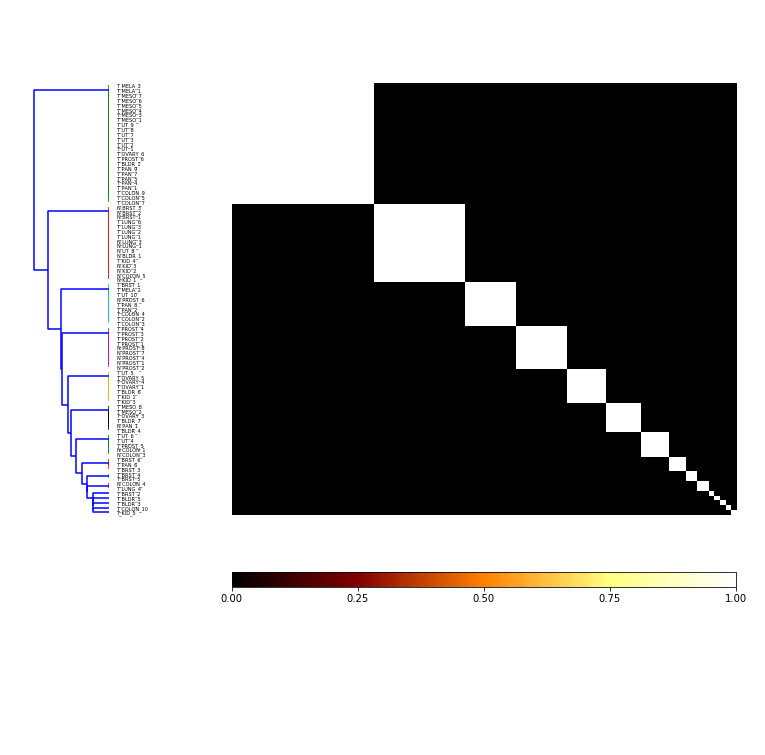

In [53]:
#Cluster the data in the original dimensionality for comparison
c_orig = oe.cluster(d)
c_orig.cluster('zscore', 'agglomerative', 'aggl_all', K)
comat_all = c_orig.co_occurrence_matrix('zscore')
fig = comat_all.plot(linkage='ward')
fig.savefig('comat_all.eps')

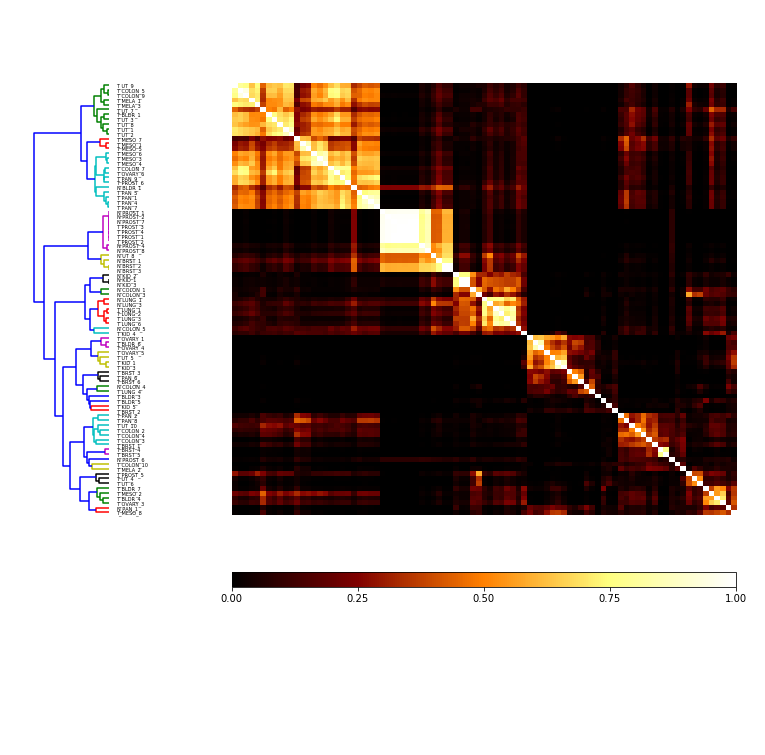

In [52]:
comat = c.co_occurrence_matrix('zscore')
fig = comat.plot(linkage='ward')#, label_vec = list_vals)
fig.savefig('comat.eps') # the 

In [55]:
#How many clusters are identified by majority vote
cMV = c.finish_majority_vote(threshold=0.5)

In [59]:
cMV.clusterNumbers['majority_vote']

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

In [ ]:
# how similar are the solutions?

In [7]:
mi_adjusted = c.MI(MI_type='adjusted')
mi_adjusted.plot()

/anaconda2/envs/py36/lib/python3.6/site-packages/openensembles/mutualinformation.py:81: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  d = d.set_value(name_1, name_2, MI)
/anaconda2/envs/py36/lib/python3.6/site-packages/openensembles/mutualinformation.py:82: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  d = d.set_value(name_2, name_1, MI)


KeyboardInterrupt: 